# Navigation

---

In this report, I describe solving the Banana environment with vanilla Deep Q Network ("DQN") and DQN with improvements.

## Deep Q-Network

Deep Q-Network combines reinforcement learning with a class of artificial neural network known as deep neural networks (Mnih et al. 2015). An agent interacts with an environment through a sequence of observations, actions, and rewards. The goal of the agent is to select an action that maximizes cumulative future reward. The following deep neural network is used to approximate the optimal action-value function which is the maximum sum of rewards $r_{t}$ discounted by at each timestep t, achievable by a behaviour policy $π=P(s|a)$, after making an observation (s) and taking an action (a).

$$
Q^{*}(s, a) = \underset{\pi}{\operatorname{max}}E[r_{t}+γr_{t+1}+γ^{2}r_{t+2}+...|s_{t}=s, a_{t}=a, π]
$$

In order to approximate the optimal-value function, the loss function below is miminized:

$$
L_{i}(θ_{i})=E_{(s,a,r,s')~U(D)}[(r+γ\underset{a'}{\operatorname{max}}Q(s',a';θ_{i}^{-}-Q(s,a;θ_{i})^{2}]
$$

in which γ is the discount factor determining the agent's horizon, $θ_{i}$ are the parameters of the Q-network at iteration i and $θ_{i}^{-}$ are the network parameters used to compute the target at iteration i. The target network parameters are only updated with the Q-network paratermers every C steps and are held fixed between individual updates.

## Implementation
I tested vanilla DQN and DQN with the following improvements.
1. Prioritized Experience Replay ("PER"): Unlike the ordinary experience replay, PER does weighted sampling using the probabilities calculated based on temporal dependence error.
2. Double DQN: In order to prevent overestimation of Q-values, Double DQN selects the best action based on the local network, and Q-value is calculated using the target network.
3. Dueling DQN: In order to make the network to better differentiate actions from one another, Dueling DQN estimates the value function and the advantage functions separately.
4. N-Step DQN: In order to expedite the training, N-Step DQN bootstraps n-steps instead of one to build temporal dependence target.
5. Distributional DQN: In order to approximate the distribution of returns, rather than the mean of returns, Distributional DQN estimates the probability for each return range.
6. Noisy DQN: In order to promote efficient exploration, Noisy DQN introduces noise to network weights.

## Result
With vanilla DQN, the agent accomplished the average score of 13 over 100 consecutive episodes in 825 episodes. Rainbow DQN without PER and Distributional Returns surpassed the average score of 13 in 250 episodes. Lastly, Rainbow DQN without PER surpassed the average score of 13 in [[x]] episodes. The trajectory of score for each algorithm is shown in the following graphs:
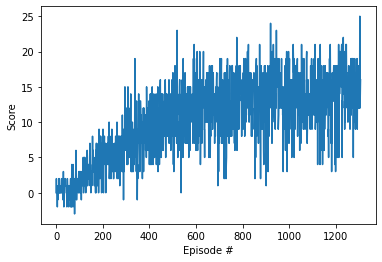
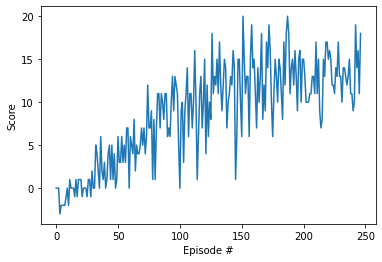

I did not use PER as the agent did not appear to learn at all using it. For this Banana environment, N-Step DQN and Noisy DQN appear to contribute drastically to the learning speed. Yet, with N-Step DQN, the agent was not able to learn much more than the average score of 13. Without it, the agent with the other modifications learned and scored up to the average score of 18.

## Hyperparameters

| Hyperparameter | Vanilla DQN | Rainbow DQN without PER and Distributional Returns | Rainbow DQN without PER |
| --- | --- | --- | --- |
| Optimizer | Adam | Adam | Adam |
| Learning Rate | 5e-4 | 5e-4 | 5e-4 |
| Replay Buffer Size | 1e5 | 1e5 | 1e5 |
| Batch Size | 128 | 128 | 128 |
| Tau | 1e-3 | 1e-3 | 1e-3 |
| Discount Factor | 0.99 | 0.99 | 0.99 |
| Step Size | n.a. | 3 | 3 |


## Future Ideas
- A more systematic approach in tuning hyperparameters such as grid search or random search would be beneficial. 
- Exploring in which circumstances PER works well and doesn not work well would be useful.
- Better understanding the advantages and disadvantages of each modification, and possible tension between modifications would help determine which modification or combination of modifications to use in each situation.
- Tuning the number of atoms and the range of returns for Distributional DQN would enable me to employ the modification more effectively.

## Reference
- Bellemare, M. et al., "A Distributional Perspective on Reinforcement Learning", 2017, available at https://arxiv.org/pdf/1707.06887.pdf.
- Forunato, M. et al., "Noisy Networks for Exploration", 2018, available at https://arxiv.org/pdf/1706.10295.pdf.
- Hessel, M. et al., "Rainbow: Combining Improvements in Deep Reinforcement Learning", 2017, available at https://arxiv.org/pdf/1710.02298.pdf.
- Lapan, M., "Summary: Noisy Networks for Exploration", October 31, 2017, Medium, available at https://shmuma.medium.com/summary-noisy-networks-for-exploration-c8ba6e2759c7.